# Data Scraping
First initialize API keys for Spotipy.

In [139]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

lz_uri = 'spotify:artist:36QJpDe2go2KgaRleHCDTp'

client_id='92c8a0f02a534977a46ddc9edc25cf95'
client_secret='f6e996e2a50a4d309befc11f0bc78b9a'
client_credentials_manager = SpotifyClientCredentials(client_id='92c8a0f02a534977a46ddc9edc25cf95',client_secret='f6e996e2a50a4d309befc11f0bc78b9a')
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

Get top n songs from a range of years. (We used a small range here for speed, but originally we scraped the top 50 songs for every year from 1950 to 2022).

In [140]:
# get top songs from each year
best_songs_of_years = {}
for year in range(2015, 2016):
    results = sp.search(q=f"year:{year}", type='track', limit=5)
    song_artist = [] # (song, artist) top 50 of year

    for track in results['tracks']['items']:
        song_artist.append({"title" : track['name'], "artist" : track['artists'][0]['name']})
    
    best_songs_of_years[year] = song_artist

print(best_songs_of_years)

{2015: [{'title': 'Space Song', 'artist': 'Beach House'}, {'title': 'Tennessee Whiskey', 'artist': 'Chris Stapleton'}, {'title': "Don't", 'artist': 'Bryson Tiller'}, {'title': 'Star Shopping', 'artist': 'Lil Peep'}, {'title': 'The Hills', 'artist': 'The Weeknd'}]}


Initialize API keys for Genius API to scrape lyrics of ever song.

In [142]:
from lyricsgenius import Genius
genius_access_token = 'gft0XToPCTQM6M1gHxSswQdYoz6XZPnhVFFexzh-hU4rAwfVWv89I5sID1RA-NjO'
genius = Genius(genius_access_token)

Function to get lyrics given a song name and artist.

In [143]:
def get_lyrics(song, artist):
    song = genius.search_song(song, artist)
    return song.lyrics

print(get_lyrics( "Bohemian Rhapsody","Queen"))

Searching for "Bohemian Rhapsody" by Queen...
Done.
460 ContributorsTranslationsDeutschTürkçeไทย / Phasa ThaiEspañolPortuguêsفارسیBohemian Rhapsody Lyrics[Intro]
Is this the real life? Is this just fantasy?
Caught in a landslide, no escape from reality
Open your eyes, look up to the skies and see
I'm just a poor boy, I need no sympathy
Because I'm easy come, easy go, little high, little low
Any way the wind blows doesn't really matter to me, to me

[Verse 1]
Mama, just killed a man
Put a gun against his head, pulled my trigger, now he's dead
Mama, life had just begun
But now I've gone and thrown it all away
Mama, ooh, didn't mean to make you cry
If I'm not back again this time tomorrow
Carry on, carry on as if nothing really matters
[Verse 2]
Too late, my time has come
Sends shivers down my spine, body's aching all the time
Goodbye, everybody, I've got to go
Gotta leave you all behind and face the truth
Mama, ooh (Any way the wind blows)
I don't wanna die
I sometimes wish I'd never bee

Scrape lyrics of every song in best_songs_of_years

In [144]:
import numpy as np
# add lyrics to best_songs_of_years
for year in best_songs_of_years:
    for i in range(len(best_songs_of_years[2015])):
        song_title=str(best_songs_of_years[year][i]["title"])
        artist_name=str(best_songs_of_years[year][i]["artist"])
        try:
            lyrics = get_lyrics(song=song_title, artist=artist_name)
            best_songs_of_years[year][i]["lyrics"] = lyrics
        except:
            best_songs_of_years[year][i]["lyrics"] = np.nan

Searching for "Space Song" by Beach House...
Done.
Searching for "Tennessee Whiskey" by Chris Stapleton...
Searching for "Don't" by Bryson Tiller...
Done.
Searching for "Star Shopping" by Lil Peep...
Done.
Searching for "The Hills" by The Weeknd...
Done.


In [145]:
best_songs_of_years

{2015: [{'title': 'Space Song',
   'artist': 'Beach House',
   'lyrics': "82 ContributorsTranslationsFrançaisSpace Song Lyrics[Verse 1]\nIt was late at night\nYou held on tight\nFrom an empty seat\nA flash of light\nIt will take a while\nTo make you smile\nSomewhere in these eyes\nI'm on your side\nYou wide-eyed girls\nYou get it right\n[Chorus]\nFall back into place\nFall back into place\n\n[Verse 2]\nTender is the night\nFor a broken heart\nWho will dry your eyes\nWhen it falls apart?\nWhat makes this fragile world go 'round?\nWere you ever lost?\nWas she ever found?\nSomewhere in these eyes\n\n[Chorus]\nFall back into place\nFall back into place\nFall back into place\nFall back into place\nFall back into place\nFall back into place\nFall back into place\nFall back into place\nFall back into place\nFall back into place\nFall back into place\nFall back into place\nFall back into place\nFall back inYou might also like105Embed"},
  {'title': 'Tennessee Whiskey', 'artist': 'Chris Staplet

Save data in json.

In [ ]:
import json
with open("songs_demo.json", "w") as outfile:
    json.dump(best_songs_of_years, outfile)

# Data Analysis

Run necessary imports.

In [2]:
import pandas as pd
import json

with open('songs4.json') as f:
    data = json.load(f)

We can now use 2 for loops to iterate through all of the titles within our dataset and find the average length of the titles for the song in each year and compare them.

In [3]:
import statistics
avg_title_length_dict = {}
for year in range(1950,2023):
    title_length = 0
    for song in range(0,50):
        title = data[str(year)][song]['title']
        title_length += len(title.split())
    avg_title_length = (title_length/50)
    avg_title_length_dict[str(year)] = avg_title_length
print(avg_title_length_dict)
print(statistics.mean(avg_title_length_dict.values()))

{'1950': 3.7, '1951': 3.58, '1952': 3.74, '1953': 3.92, '1954': 3.82, '1955': 3.78, '1956': 4.66, '1957': 4.54, '1958': 3.52, '1959': 4.34, '1960': 4.18, '1961': 4.22, '1962': 4.42, '1963': 4.74, '1964': 4.62, '1965': 4.8, '1966': 4.52, '1967': 4.16, '1968': 5.3, '1969': 3.92, '1970': 4.22, '1971': 4.78, '1972': 4.04, '1973': 3.92, '1974': 3.76, '1975': 4.22, '1976': 4.02, '1977': 4.02, '1978': 3.62, '1979': 4.08, '1980': 4.32, '1981': 4.14, '1982': 3.84, '1983': 4.28, '1984': 4.2, '1985': 4.14, '1986': 3.9, '1987': 4.74, '1988': 3.06, '1989': 3.32, '1990': 3.5, '1991': 3.46, '1992': 3.5, '1993': 4.26, '1994': 3.14, '1995': 3.2, '1996': 3.42, '1997': 3.58, '1998': 3.12, '1999': 3.08, '2000': 3.28, '2001': 2.92, '2002': 2.84, '2003': 3.04, '2004': 2.98, '2005': 2.9, '2006': 2.98, '2007': 2.6, '2008': 2.28, '2009': 2.74, '2010': 3.28, '2011': 3.12, '2012': 2.9, '2013': 3.1, '2014': 2.64, '2015': 2.92, '2016': 2.54, '2017': 2.74, '2018': 3.34, '2019': 2.7, '2020': 3.06, '2021': 3.54, '202

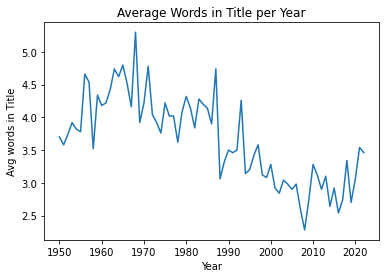

In [4]:
import matplotlib.pyplot as plt

# create lists of x and y values
x = list(map(int, avg_title_length_dict.keys()))
y = list(avg_title_length_dict.values())

# create line graph
plt.plot(x, y)

# add labels and title
plt.xlabel('Year')
plt.ylabel('Avg words in Title')
plt.title('Average Words in Title per Year')


# display the graph
plt.show()

We can now use Afinn, which measures the connotation of words from a scale of [-5,5] where the lower the number means the word has a negative connotation. By iterating through all of the lyrics we can find which years had a lyrics with positive or negative connotations. 

In [4]:
from afinn import Afinn
afinn = Afinn()
connotation_dict = {}
for year in range(1950,2023):
    connotation_score = 0
    for song in range(0,50):
        lyrics = data[str(year)][song]['lyrics']
        connotation_score += afinn.score(str(lyrics))
    avg_con_score = (connotation_score/50)
    connotation_dict[str(year)] = avg_con_score

We can now put the years in order from most negative to most positive. We can do a lot of analysis om this data.

In [96]:
sorted_dict = dict(sorted(connotation_dict.items(), key=lambda item: item[1]))
print(sorted_dict)
print("The average afinn score for the entire dataset is " + str(sum(connotation_dict.values())/len(connotation_dict)))

{'1980': -81.06, '1987': -62.64, '1973': -31.82, '1970': -29.88, '1998': -28.06, '1992': -26.4, '1981': -22.82, '1976': -21.68, '1966': -19.9, '2000': -19.56, '1959': -17.5, '1986': -15.72, '1954': -13.76, '2013': -13.08, '2022': -12.5, '1969': -10.18, '1995': -8.48, '2015': -8.38, '2014': -7.52, '1967': -7.2, '2002': -6.52, '1957': -6.3, '1988': -5.68, '1990': -5.3, '1960': -4.38, '1989': -4.3, '1964': -4.2, '1999': -1.98, '2018': -1.42, '1963': -0.76, '2001': -0.06, '2019': -0.06, '2016': -0.02, '1996': 1.42, '1950': 1.62, '2017': 2.66, '2005': 4.72, '1952': 5.46, '1982': 6.04, '1991': 6.34, '2011': 6.86, '2003': 6.94, '2009': 8.2, '1961': 8.72, '1972': 9.32, '1997': 9.46, '1978': 10.4, '2004': 10.56, '2012': 11.0, '1974': 12.52, '1958': 12.68, '1955': 13.0, '2020': 13.72, '1993': 14.1, '1968': 14.7, '2008': 15.4, '2010': 16.32, '1975': 16.52, '2007': 17.12, '1984': 26.56, '1962': 32.74, '2006': 34.18, '1985': 37.3, '1956': 48.92, '2021': 49.48, '1979': 53.82, '1965': 60.68, '1994': 

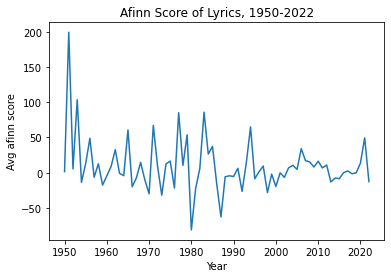

In [5]:
import matplotlib.pyplot as plt

# create lists of x and y values
x = list(map(int, connotation_dict.keys()))
y = list(connotation_dict.values())

# create line graph
plt.plot(x, y)

# add labels and title
plt.xlabel('Year')
plt.ylabel('Avg afinn score')
plt.title('Afinn Score of Lyrics, 1950-2022')

# display the graph
plt.show()

In [113]:
title_word_counts = {}
for year in range(1950,2023):
    title_length = 0
    for song in range(0,50):
        title = data[str(year)][song]['title']
        # make the titles lowercase 
        lower_title = title.lower()
        # Remove spaces and special characters
        no_punc = ''.join(e for e in lower_title if e.isalnum() or e.isspace())
        words = no_punc.split()
        # count the frequency of each word
        for word in words:
            if word in title_word_counts:
                title_word_counts[word] += 1
            else:
                title_word_counts[word] = 1
# sort the dictionary by word count in descending order
sorted_word_counts = sorted(title_word_counts.items(), key=lambda item: item[1], reverse=True)

# print the top 20 most frequent words
for word, count in sorted_word_counts[:20]:
    print(f'{word}: {count}')

the: 478
you: 289
me: 220
i: 202
remaster: 193
a: 192
love: 183
in: 183
remastered: 176
of: 162
my: 157
to: 153
on: 113
it: 113
feat: 91
and: 77
version: 75
with: 73
for: 64
all: 64


In [137]:
with open('Top500.json', 'r') as f:
    top500 = json.load(f)

top_500_count = {}
for year in range(1950,2023):
    count = 0
    for song in range(0,50):
        title = data[str(year)][song]['title']
        if any(title == song_dict['title'] for song_dict in top500['songs']):
            count += 1
    top_500_count[str(year)] = count

print(top_500_count)


{'1950': 0, '1951': 0, '1952': 2, '1953': 1, '1954': 0, '1955': 1, '1956': 1, '1957': 3, '1958': 10, '1959': 7, '1960': 2, '1961': 7, '1962': 7, '1963': 5, '1964': 10, '1965': 15, '1966': 5, '1967': 12, '1968': 5, '1969': 11, '1970': 4, '1971': 6, '1972': 6, '1973': 5, '1974': 3, '1975': 5, '1976': 2, '1977': 1, '1978': 3, '1979': 3, '1980': 1, '1981': 2, '1982': 3, '1983': 2, '1984': 5, '1985': 0, '1986': 3, '1987': 2, '1988': 1, '1989': 4, '1990': 1, '1991': 4, '1992': 0, '1993': 1, '1994': 3, '1995': 0, '1996': 2, '1997': 1, '1998': 1, '1999': 0, '2000': 1, '2001': 4, '2002': 2, '2003': 4, '2004': 5, '2005': 0, '2006': 1, '2007': 2, '2008': 2, '2009': 0, '2010': 1, '2011': 0, '2012': 0, '2013': 0, '2014': 2, '2015': 0, '2016': 0, '2017': 0, '2018': 0, '2019': 0, '2020': 0, '2021': 0, '2022': 0}
